In [23]:
import json
import pandas as pd
import networkx as nx
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from itertools import groupby
from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4

In [2]:
G = nx.Graph()

In [3]:
#Run this
with open('data.txt') as json_file:
    data = json.load(json_file)

In [4]:
#Run this
#May not actually need this - LOL
#This works now! It will output a dataframe of all the papers, along with the DOI of all papers that reference them
output_df = []
tmp_df = []

for reference in data:
    for individual in reference['references']:
        if 'DOI' in individual:
            paper_title = reference['title']
            reference_info = json_normalize(individual)
            d = {'Title': reference['title'], 'Reference_Info': json_normalize(individual)['DOI']}
#            output_df.append(d)
            tmp_df = pd.DataFrame(d)
            output_df.append(tmp_df)
#            output_df = pd.DataFrame(json_normalize(reference_info))

In [5]:
#Run this
test_df = json_normalize(data, record_path='references', meta = 'title')
test_df_two = test_df.dropna(subset = ['DOI'])
test_df_two['freq'] = test_df_two.groupby('DOI')['DOI'].transform('count')
graph_df = test_df_two[test_df_two['freq']!=1]

c:\users\jack galati\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
#Run this
citation_network = pd.merge(graph_df[['title', 'DOI']],
                           graph_df[['title', 'DOI']],
                           left_on = 'DOI',
                           right_on = 'DOI',
                           how = 'left')

In [9]:
citation_network.head()#[['title_y', 'title_x']]

,title_x,DOI,title_y
0,Thyroid hormones for acute kidney injury,10.1136/bmj.327.7414.557,Thyroid hormones for acute kidney injury
1,Thyroid hormones for acute kidney injury,10.1136/bmj.327.7414.557,Chinese herbal medicines for hypertriglycerida...
2,Thyroid hormones for acute kidney injury,10.1136/bmj.327.7414.557,Direct renin inhibitors for preventing the pro...
3,Thyroid hormones for acute kidney injury,10.1136/bmj.327.7414.557,Magnesium-based interventions for people with ...
4,Thyroid hormones for acute kidney injury,10.1136/bmj.327.7414.557,Interventions for infected cysts in people wit...


In [14]:
G.clear()
G = nx.Graph()

In [293]:
G.add_nodes_from(citation_network['str_title_y'])
G.add_nodes_from(citation_network['str_title_x'])

In [322]:
G.add_edges_from(citation_network['str_title_y'], citation_network['str_title_x'])

TypeError: add_edges_from() takes 2 positional arguments but 3 were given

In [7]:
x_list = citation_network['title_x'].tolist()
y_list = citation_network['title_y'].tolist()

In [348]:
edgelist = []
for v1,v2 in zip(x_list,y_list):
    edgelist.extend([(v1,v) for v in v2])

MemoryError: 

In [16]:
network_dict = dict(zip(x_list, y_list))

In [17]:
print(network_dict)

{'Thyroid hormones for acute kidney injury': 'Angiotensin-converting enzyme inhibitor usage and acute kidney injury: A secondary analysis of RENAL study outcomes', 'Refugee children: Rights and wrongs': 'Mental health screening in immigration detention: A fresh look at Australian government data', 'Association between putative functional variants in thePSMB9gene and risk of melanoma - re-analysis of published melanoma genome-wide association studies': 'IRF4 haploinsufficiency in a family with Whipple’s disease', 'Reply': 'Reply', "A critical epidemiological review of cardiovascular disease risk in HIV-infected adults: the importance of the HIV-uninfected comparison group, confounding, and competing risks - authors' reply": 'Growing challenges for HIV programmes in Asia: clinic population trends, 2003–2013', 'Optimal Tension, Position, and Number of Prostheses Required for Maximum Rima Glottidis Area After Laryngoplasty': 'A review of recent developments in the clinical application of p

In [18]:
G = nx.Graph(network_dict)

In [20]:
G.number_of_nodes()

6180

NetworkXError: Node 'Thyroid hormones for acute kidney injury' has no position.

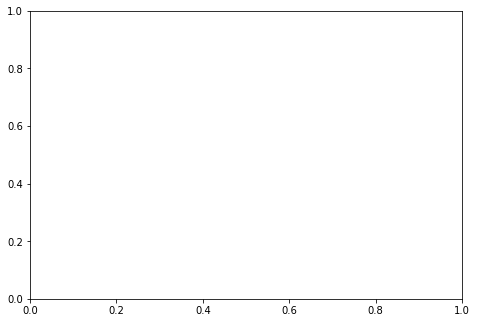

In [93]:
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

In [30]:
citation_network[citation_network['title_x']=='Quantum emission from hexagonal boron nitride monolayers']

,title_x,DOI,title_y


The below section creates a graph network for a single paper only

In [8]:
author_paper = citation_network[citation_network['title_x']=='Thyroid hormones for acute kidney injury']

In [9]:
author_x_list = author_paper['title_x'].tolist()
author_y_list = author_paper['title_y'].tolist()

In [10]:
elist = []

for item in zip(author_x_list,author_y_list):
    elist.append(item)

In [13]:
elist

[('Thyroid hormones for acute kidney injury',
  'Thyroid hormones for acute kidney injury'),
 ('Thyroid hormones for acute kidney injury',
  'Chinese herbal medicines for hypertriglyceridaemia'),
 ('Thyroid hormones for acute kidney injury',
  'Direct renin inhibitors for preventing the progression of diabetic kidney disease'),
 ('Thyroid hormones for acute kidney injury',
  'Magnesium-based interventions for people with chronic kidney disease'),
 ('Thyroid hormones for acute kidney injury',
  'Interventions for infected cysts in people with autosomal dominant polycystic kidney disease'),
 ('Thyroid hormones for acute kidney injury',
  'Interventions for chronic non-hypovolaemic hypotonic hyponatraemia'),
 ('Thyroid hormones for acute kidney injury',
  'Antibody immunosuppression for pancreas and kidney-pancreas transplant recipients'),
 ('Thyroid hormones for acute kidney injury',
  'Systematic review and meta-analysis of minimally invasive techniques for the management of cholecysto-

In [14]:
G = nx.Graph(elist)

In [15]:
print(G.number_of_nodes())
print(G.number_of_edges())

21
21


c:\users\j_m_g\appdata\local\programs\python\python37-32\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


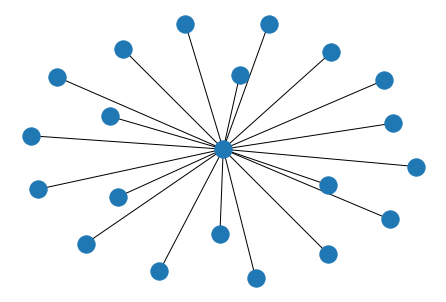

In [16]:
nx.draw(G, with_labels=False, font_weight='bold')

The below section creates a graph network for all papers connected to the single paper chosen above

In [11]:
extended_network = []
tmp_df = []
final_df = pd.DataFrame(columns=['title_x', 'DOI', 'title_y'])

for item in author_paper['title_y']:
    tmp_df = citation_network[citation_network['title_x']==item]
    final_df.append(tmp_df)

In [18]:
#Look to delete this one - Just test first

extended_network = []
tmp_df = []
final_df = pd.DataFrame(columns=['title_x', 'DOI', 'title_y'])

for item in author_paper['title_y']:
    for i in citation_network[citation_network['title_x']==item]:
        print(type(i))
        print(type(item))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [12]:
ref_list = author_paper['title_y']

In [13]:
ref_list[0]

'Thyroid hormones for acute kidney injury'

In [15]:
extended_network = citation_network.loc[citation_network['title_x'].isin(ref_list)]

In [16]:
extended_x_list = extended_network['title_x'].tolist()
extended_y_list = extended_network['title_y'].tolist()

In [17]:
extendedlist = []

for item in zip(extended_x_list,extended_y_list):
    extendedlist.append(item)

In [18]:
G.clear()
G = nx.Graph(extendedlist)

In [19]:
print(G.number_of_nodes())
print(G.number_of_edges())

122
354


c:\users\jack galati\appdata\local\programs\python\python37-32\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


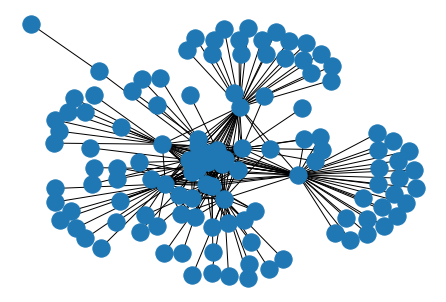

In [20]:
nx.draw(G, with_labels=False, font_weight='bold')

In [43]:
#This will cut the output down to only papers with 3 or more connections - 
   #Remember these can be connections to papers with a single connection, therefore some could look like they have less than the required 3 connections

remove = [node for node,degree in G.degree() if degree < 3]
G.remove_nodes_from(remove)

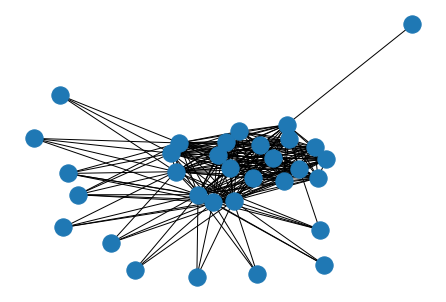

In [44]:
nx.draw(G, with_labels=False, font_weight='bold')

In [92]:
edge_attrs['edge_color']

KeyError: 'edge_color'

In [28]:
BASIC_DEGREE, HIGHER_DEGREE = "black", "red"
edge_attrs = {}

for node,degree in G.degree():
    edge_color = BASIC_DEGREE if degree == 3 else HIGHER_DEGREE
    edge_attrs[(node)] = edge_color
    
#nx.set_edge_attributes(G, edge_attrs, "edge_color")

plot = Plot(plot_width=1200, plot_height=800,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

plot.title.text = "Graph Interaction Demonstration"
node_hover_tool = HoverTool(line_policy = 'interp', tooltips=[("Title", "@index")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=12, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_alpha=0.8, line_width=1)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

#graph_renderer.selection_policy = NodesAndLinkedEdges()
#graph_renderer.inspection_policy=EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)